# Exploratory Data Analysis on Netflix Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
data  = pd.read_csv("C:\\Users\\Acer\\Documents\\netflix_titles.csv")

In [3]:
# data columns information
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# get top rows of data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [6]:
# Creating function to get all basic information
def all(data):
    print("Total number of show and movies: ",data.shape[0])
    print("data set variable: ",data.shape[1])
    print("-"*60)
    print("Data type of each variable(column): ",data.dtypes)
all(data)

Total number of show and movies:  6234
data set variable:  12
------------------------------------------------------------
Data type of each variable(column):  show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
# missing value in each column
print("missing value in each column: ",data.isna().sum())

missing value in each column:  show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [8]:
# deleting unwanted column from data
data = data.drop('show_id',axis =1)

In [9]:
# column droped
data.columns


Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# find duplicate data
dupli = data.duplicated(["title","type",'country','release_year'])
data[dupli]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2124,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
5930,TV Show,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",Japan,"July 4, 2019",2019,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...


In [11]:
# drop duplicate data
data = data.drop_duplicates(["title","type",'country','release_year'])
print("current number of rows: ",data.shape[0]," befor it was 6234")

current number of rows:  6232  befor it was 6234


In [12]:
# filling missing value of rating column by mode
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

# filling missing value of data_added column by mode of year
data['date_added'] = data['date_added'].fillna('january 1, {}'.format(str(data['release_year'].mode()[0])))

In [13]:
# replacing all null values 
data.director.fillna("No Director", inplace=True)
data.cast.fillna("No cast",inplace =True)
data.country.fillna("No country",inplace = True)

In [14]:
# now we don't have missing value in given data
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

 #As we know about rating colum "UR" and "NR" both are same so we will change it and keep NR only

In [15]:
for i in data.index:
    if data.loc[i,"rating"] == "UR":
        data.loc[i,"rating"] = "NR"

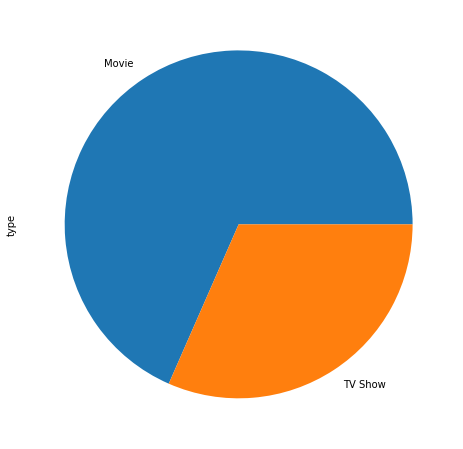

In [16]:
# Movie and Tv Show frequency
plt.figure(figsize=(12,8))
data['type'].value_counts().plot(kind='pie')
plt.show()

Text(0, 0.5, 'Frequency')

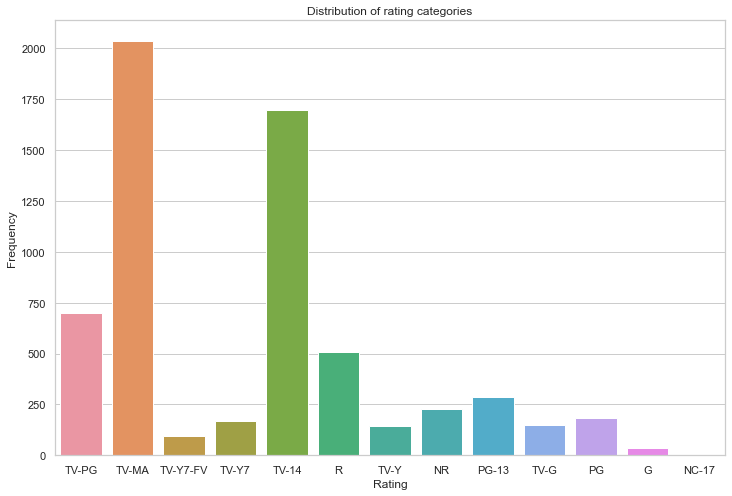

In [17]:
# Distribution of rating categories
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
sns.countplot(x="rating",data= data)
plt.title("Distribution of rating categories")
plt.xlabel("Rating")
plt.ylabel("Frequency")



Text(0.5, 1.0, 'comparing frequecy between type and rating')

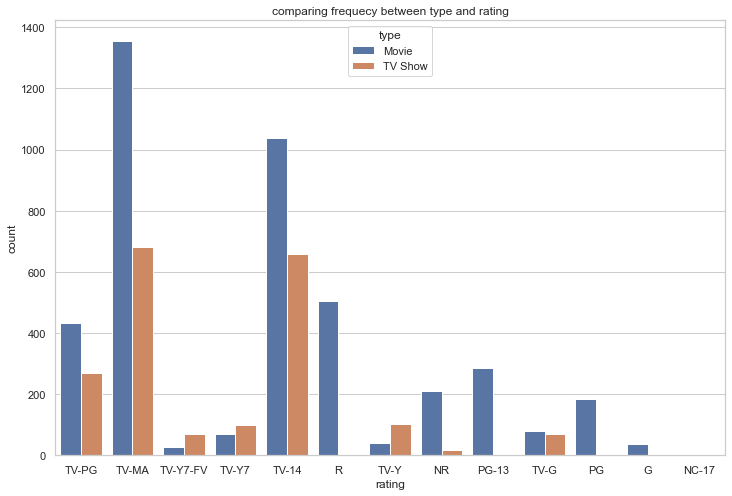

In [18]:
# Distribution of rating categories based on type
sns.set(style='whitegrid')
plt.figure(figsize =(12,8))
sns.countplot(x ="rating",hue = "type",data=data)
plt.title("comparing frequecy between type and rating")


In [19]:
# productive countries in ascending order
data["country"].value_counts().sort_values(ascending =False).head(10)

United States     2032
India              776
No country         476
United Kingdom     348
Japan              175
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Name: country, dtype: int64

Text(0.5, 1.0, 'Comparing between the types of top productive countries')

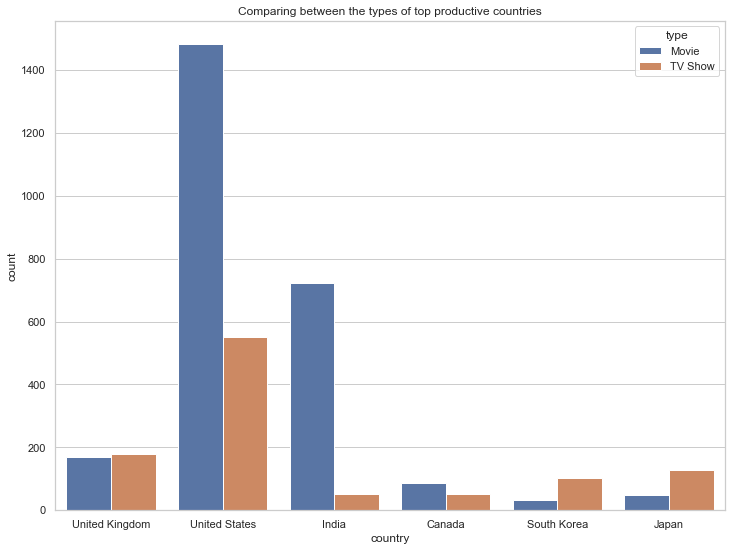

In [20]:
# extracting the top productive countries in another dataframe
top_productive_countries = data[(data["country"]== "United States") |(data["country"]== "India")|
                               (data["country"]== "United Kingdom")|(data["country"]== "Japan")|(data["country"]== "Canada")|
                               (data["country"]== "South Korea")]
plt.figure(figsize=(12,9))
sns.countplot(x="country",hue ="type",data=top_productive_countries)
plt.title("Comparing between the types of top productive countries")

In [21]:
# yearwise Tvshow and  Movie productions
data1 = data.groupby("release_year")['type'].value_counts()
data1

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2018          TV Show    417
2019          TV Show    442
              Movie      400
2020          TV Show     19
              Movie        6
Name: type, Length: 115, dtype: int64

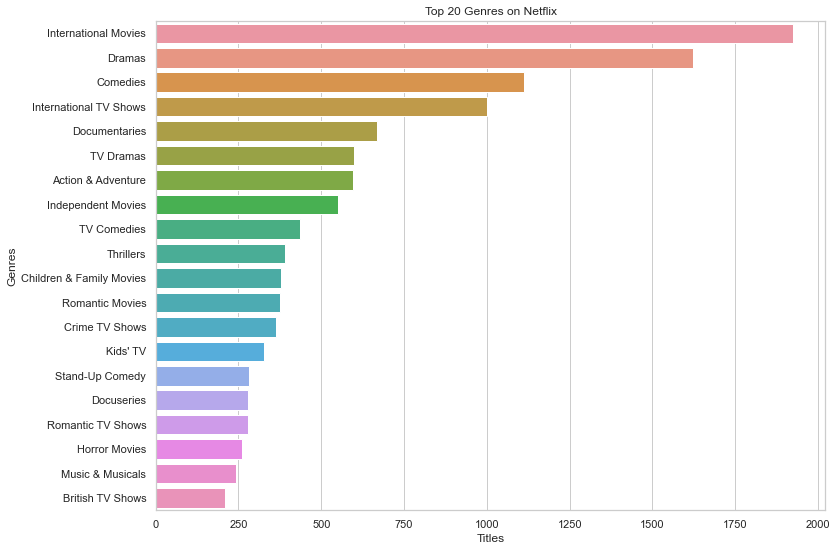

In [22]:
# top 20 Genres on netflix
filtered_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(12,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [23]:
# datatype of date_added
type(data.date_added[0])

str

In [24]:
# converting date_added which is str data type in date data type
data['date_added'] = pd.to_datetime(data['date_added'])
type(data.date_added[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
# extracting Added year and Day of week
data['added_year'] = data['date_added'].apply(lambda time: time.year)
data['Day of Week'] = data['date_added'].apply(lambda time: time.dayofweek)
data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'Day of Week'],
      dtype='object')

In [26]:
# mapping days of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

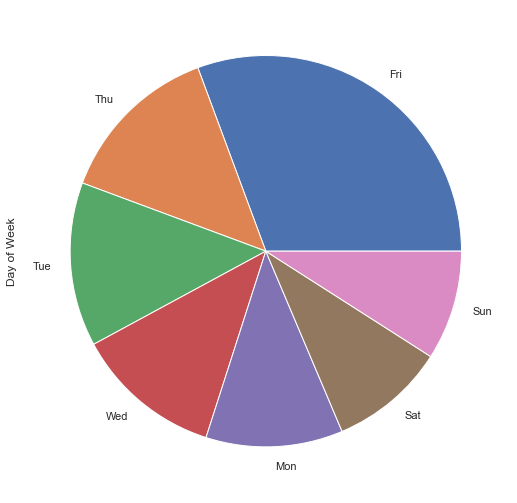

In [27]:
# Frequecy adding  movies and tv show day wise
plt.figure(figsize=(12,9))
data['Day of Week'].value_counts().plot(kind="pie")

Graph shows friday, Tue and Thu have more frequency to add new movie of tvshow

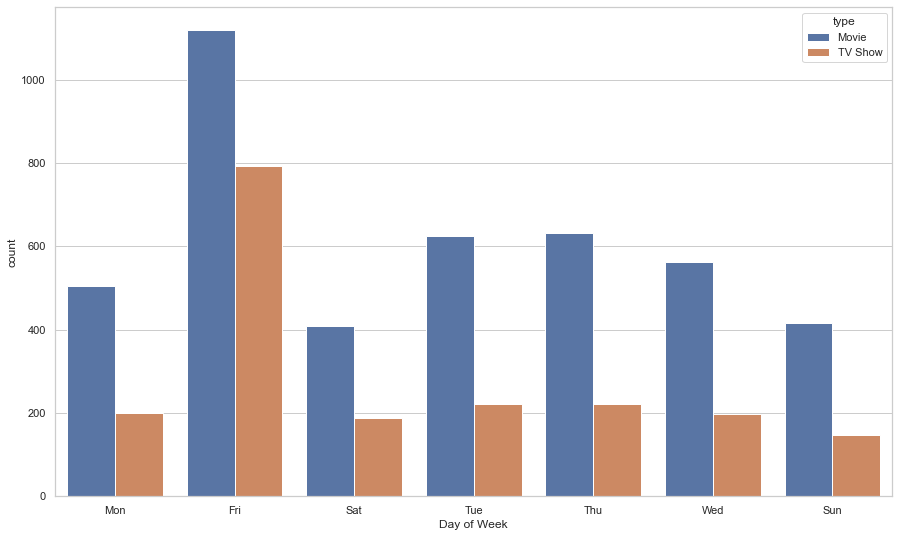

In [28]:
# daywise production of movies and Tv show
plt.figure(figsize=(15,9))
sns.countplot(x="Day of Week",hue ="type",data=data)

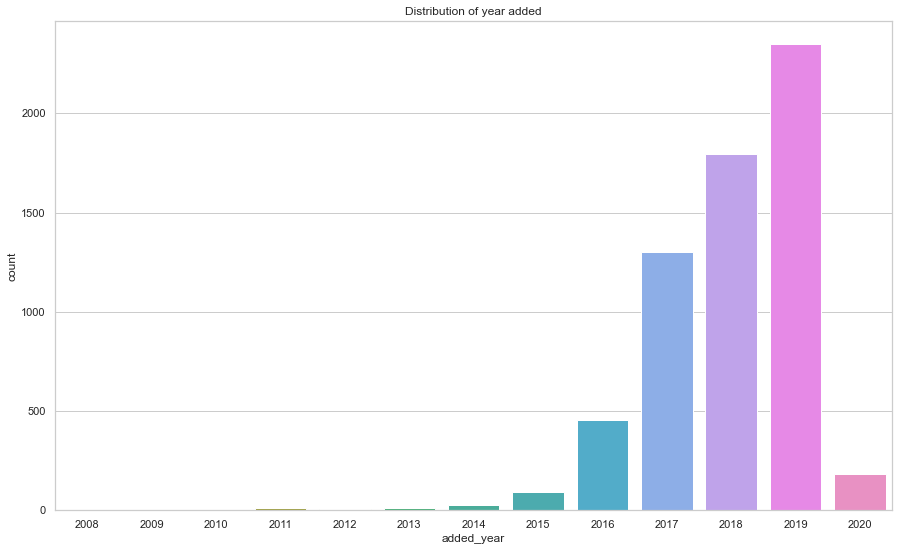

In [29]:
# let see in which year more movies added
plt.figure(figsize=(15,9))
sns.countplot(x = "added_year",data=data)
plt.title("Distribution of year added")
plt.show()

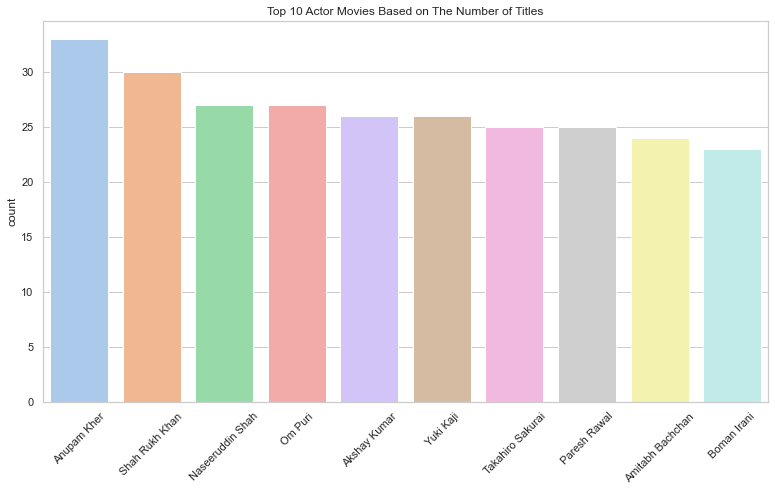

In [30]:
# which Actor have more cast in movies
filtered_cast_movie = data[data.cast != 'No cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(x = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.xticks(rotation =45)
plt.show()

  # Thank You